In [1]:
#Setting up
%pip -q install pycaret skimpy numpy pydotplus graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
import pydotplus
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from pycaret.classification import *

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None); 

# Load data
df = pd.read_csv('data/glass.csv')

sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 214    │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 10     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean      ┃ sd         ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ RI            │   0 │     0 │     1.518 │   0.003037 │  1.511 │   1.517 │  1.518 │  1.519 │ 1.534 │   ▇▃   │  │
│ │ Na            │   0 │     0 │     13.41 │     0.8166 │  10.73 │   12.91 │   13.3 │  13.82 │ 17.38 │   ▃▇▃  │  │
│ │ Mg            │   0 │     0 │     2.685 │      1.442 │      0 │   2.115 │   3.48 │    3.6 │  4.49 │ ▃ ▁▁▇▂ │  │
│ │ Al            │   0 │     0 │     1.445 │     0.4993 │   0.29 │    1.19 │   1.36 │   1.63 │   3.5 │ ▂▇▇▂▁  │  │
│ │ Si            │   0 │     0 │     72.65 │     0.7745 │  69.81 │   72.28 │  72.79 │  73.09 │ 75.41 │ ▁▁▃▇▁  │  │
│ │ K             │   0 │     0 │    0.4971 │     0.6522 │      0 │  0.1225 │  0.555 │   0.61 │  6.21 │   ▇    │  │
│ │ Ca            │   0 │     0 │     8.957 │      1.423 │   5.43 │    8.24 │    8.6 │  9.172 │ 16.19 │   ▇▃▁  │  │
│ │ Ba            │   0 │     0 │     0.175 │     0.4972 │      0 │       0 │      0 │      0 │  3.15 │   ▇▁   │  │
│ │ Fe            │   0 │     0 │   0.05701 │    0.09744 │      0 │       0 │      0 │    0.1 │  0.51 │  ▇▁▁   │  │
│ │ Type          │   0 │     0 │      2.78 │      2.104 │      1 │       1 │      2 │      3 │     7 │ ▇▇▂ ▁▃ │  │
│ └───────────────┴─────┴───────┴───────────┴────────────┴────────┴─────────┴────────┴────────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

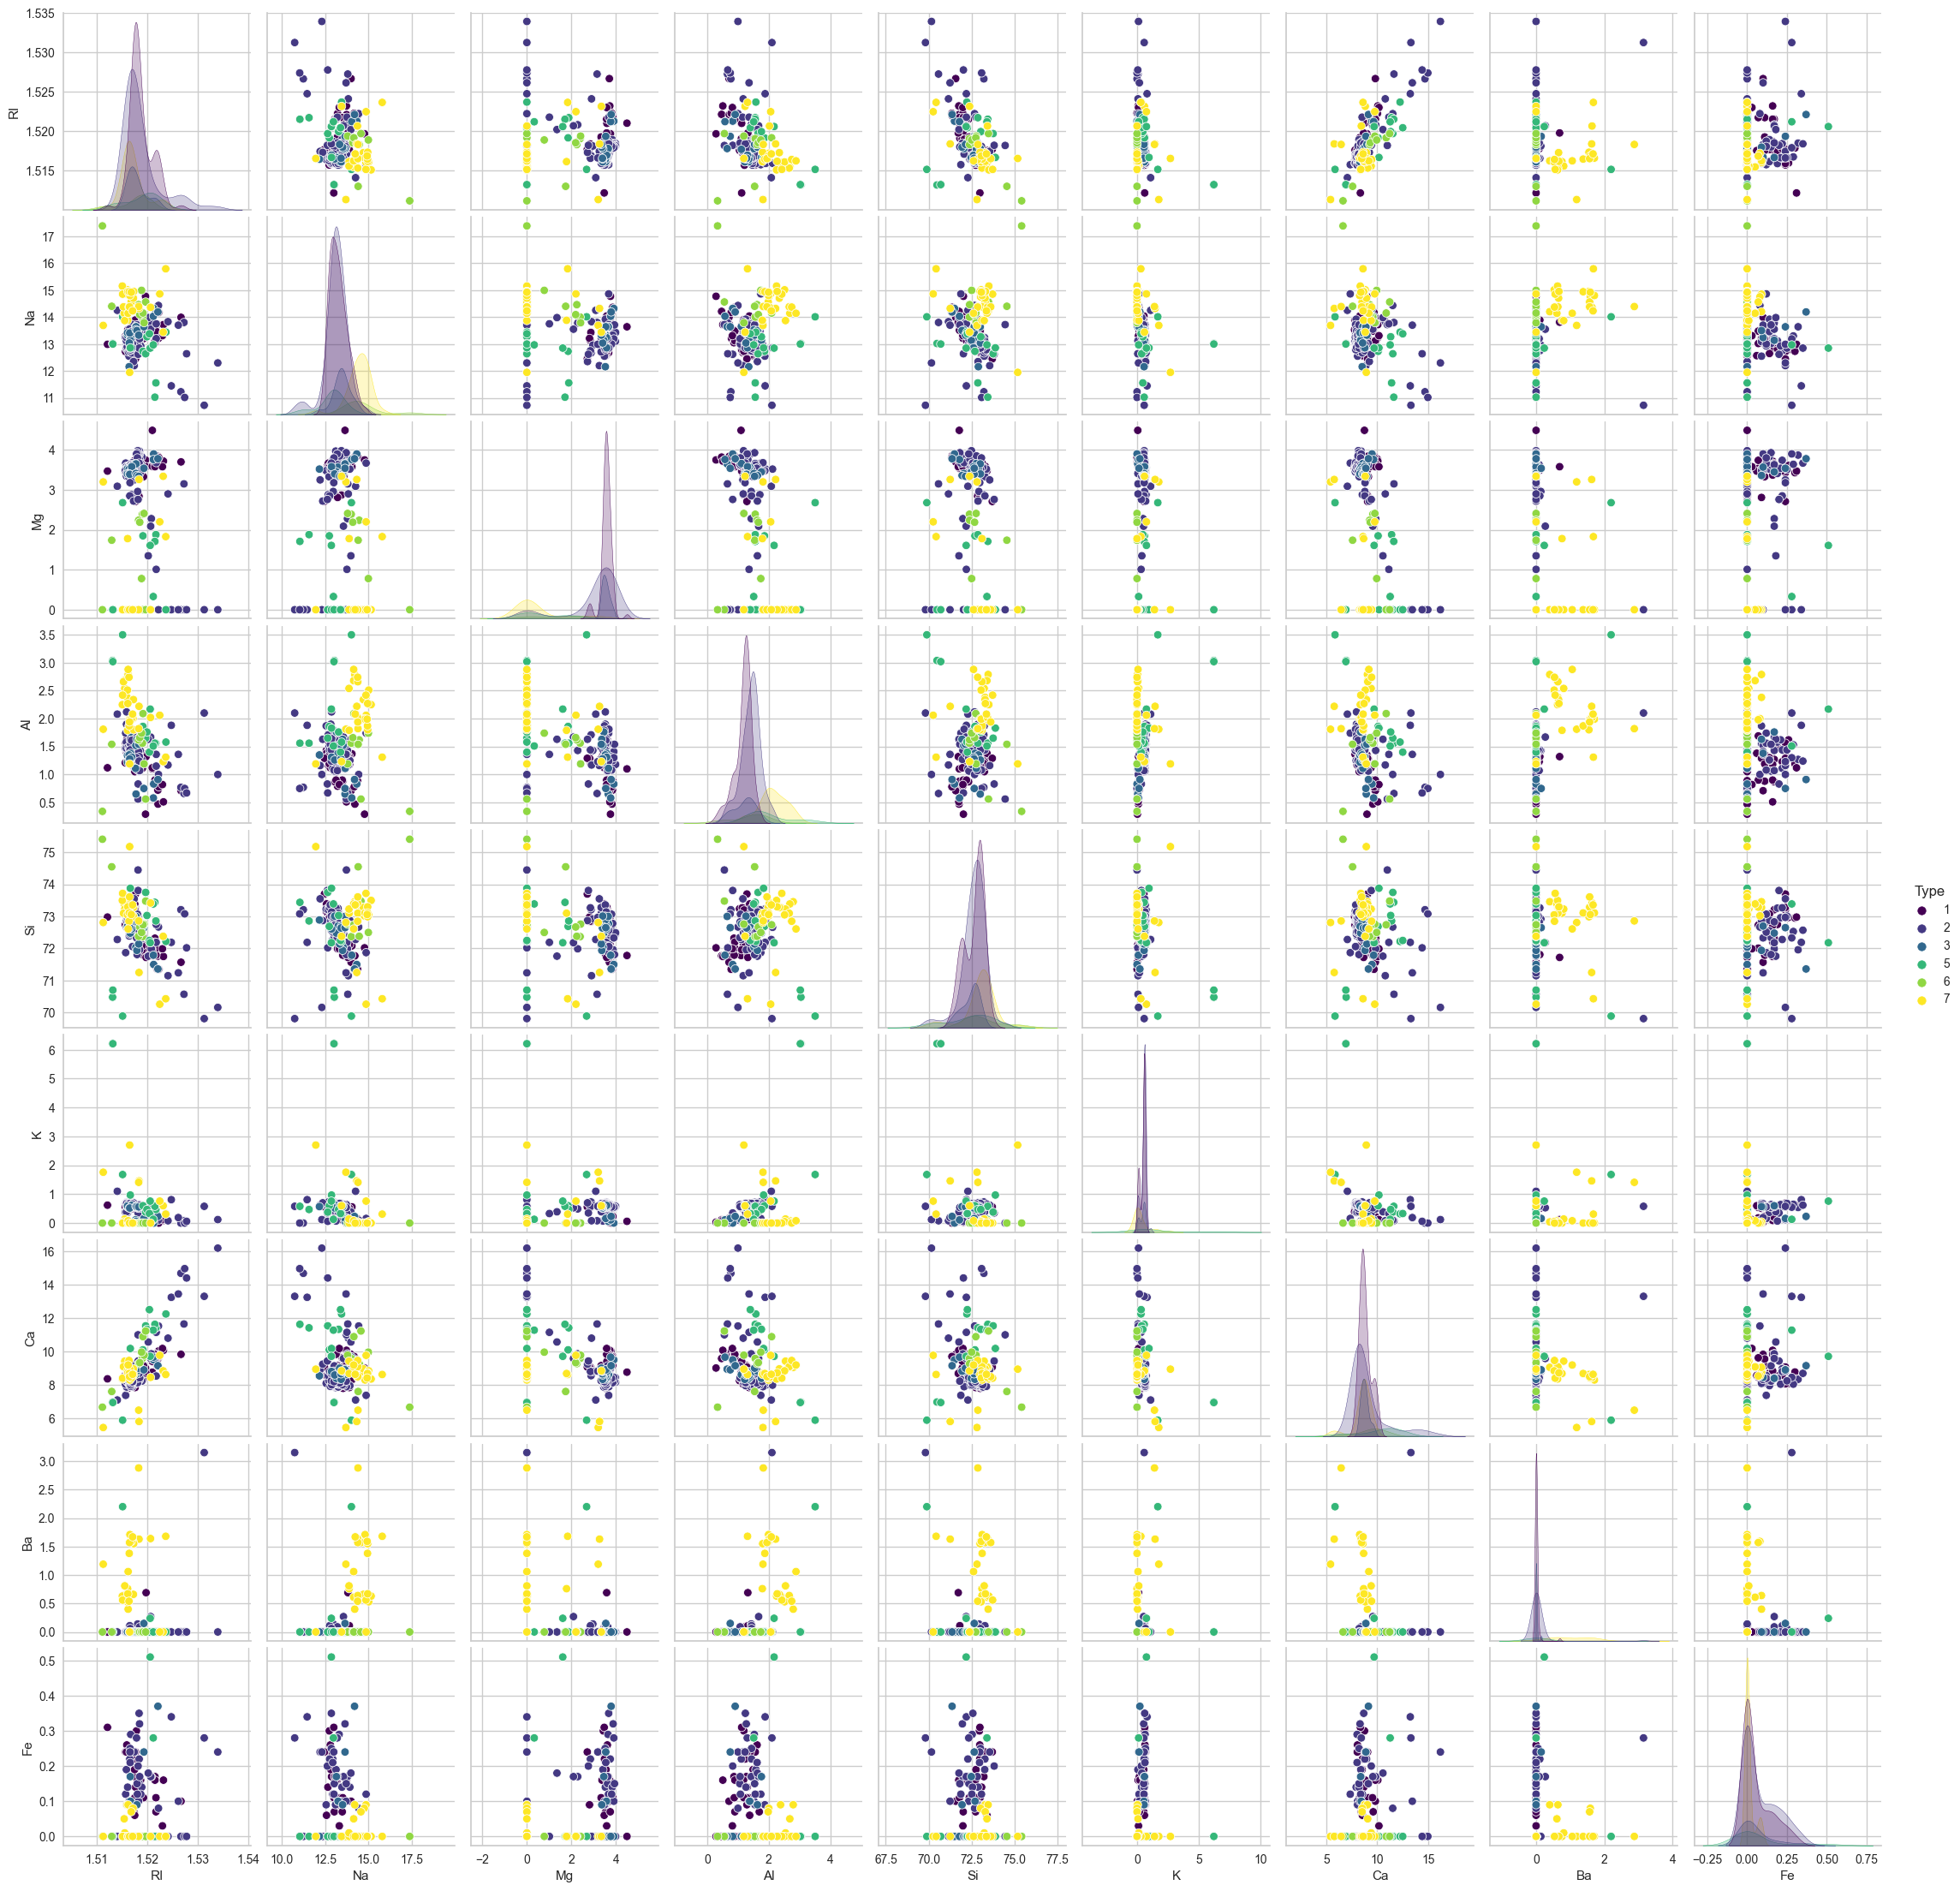

In [3]:
sns.pairplot(df, hue='Type', diag_kind='kde', palette='viridis')

In [4]:
# Check for missing values and uniques
print(df.info())
df.T.apply(lambda x: x.unique(), axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


RI      [1.52101, 1.51761, 1.51618, 1.51766, 1.51742, ...
Na      [13.64, 13.89, 13.53, 13.21, 13.27, 12.79, 13....
Mg      [4.49, 3.6, 3.55, 3.69, 3.62, 3.61, 3.58, 3.46...
Al      [1.1, 1.36, 1.54, 1.29, 1.24, 1.62, 1.14, 1.05...
Si      [71.78, 72.73, 72.99, 72.61, 73.08, 72.97, 73....
K       [0.06, 0.48, 0.39, 0.57, 0.55, 0.64, 0.58, 0.5...
Ca      [8.75, 7.83, 7.78, 8.22, 8.07, 8.17, 8.24, 8.3...
Ba      [0.0, 0.09, 0.11, 0.69, 0.14, 3.15, 0.27, 0.06...
Fe      [0.0, 0.26, 0.11, 0.24, 0.17, 0.07, 0.19, 0.14...
Type                       [1.0, 2.0, 3.0, 5.0, 6.0, 7.0]
dtype: object

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

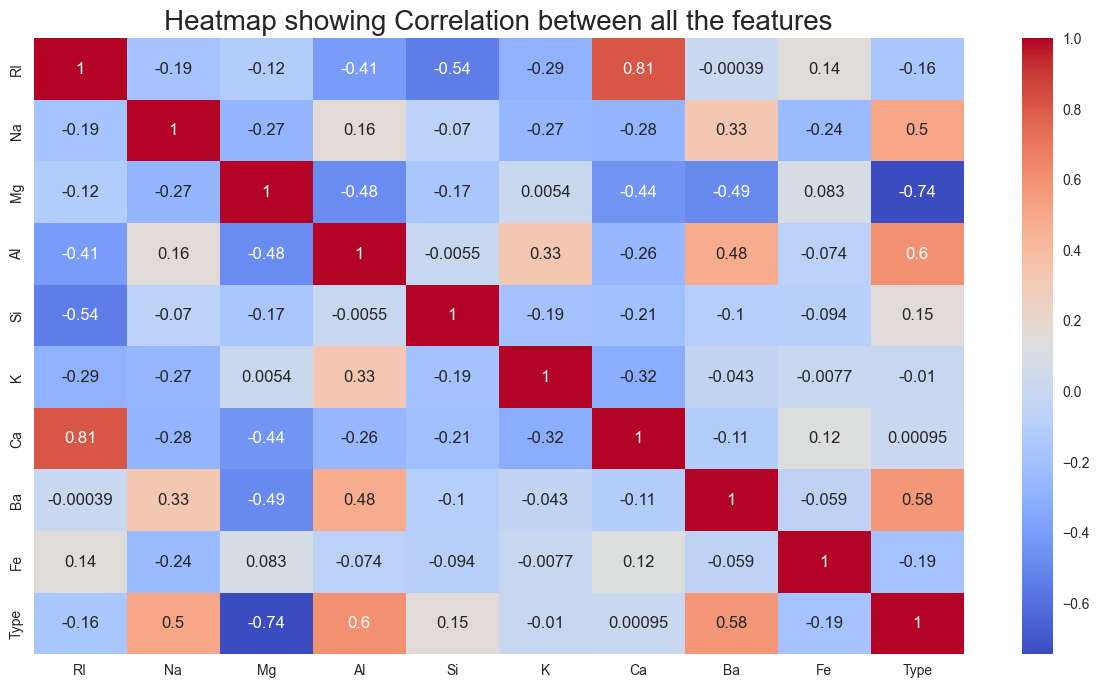

In [5]:
# correlation ??
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df.corr(),annot = True, cmap='coolwarm')

In [6]:
#checking for null values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
# removing unwanted spaces
df.columns = df.columns.str.strip().str.replace('\xa0', ' ').str.replace('\u200b', '')
df.columns = df.columns.str.translate(str.maketrans('', '', '\t\n\r\x0b\x0c'))
df.columns = df.columns.str.replace(r'\s+', '')

df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [8]:
# Split data into training and testing sets
X = df.drop('Type', axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [9]:
# Pipeline definition
pipe = Pipeline(steps=[
    ('pca', PCA(n_components=7)),
    ('classifier', RandomForestClassifier())
])

# Hyperparameter grid for Random Forest Classifier
pipe_params = {
    'classifier__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'classifier__max_depth': [None, 5, 10],  # Maximum depth of each tree
    'classifier__min_samples_split': [1, 5, 10],  # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum samples required at each leaf node
}

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(pipe, pipe_params, cv=5, verbose=True, n_iter=100)
random_search.fit(X_train_Scaled, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca', PCA(n_components=7)),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_iter=100,
                   param_distributions={'classifier__max_depth': [None, 5, 10],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [1, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300]},
                   verbose=True)

In [10]:
print("Shape of X_train:", X_train_Scaled.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (149, 9)
Shape of y_train: (149,)


Text(0.5, 1.0, 'Feature Importance')

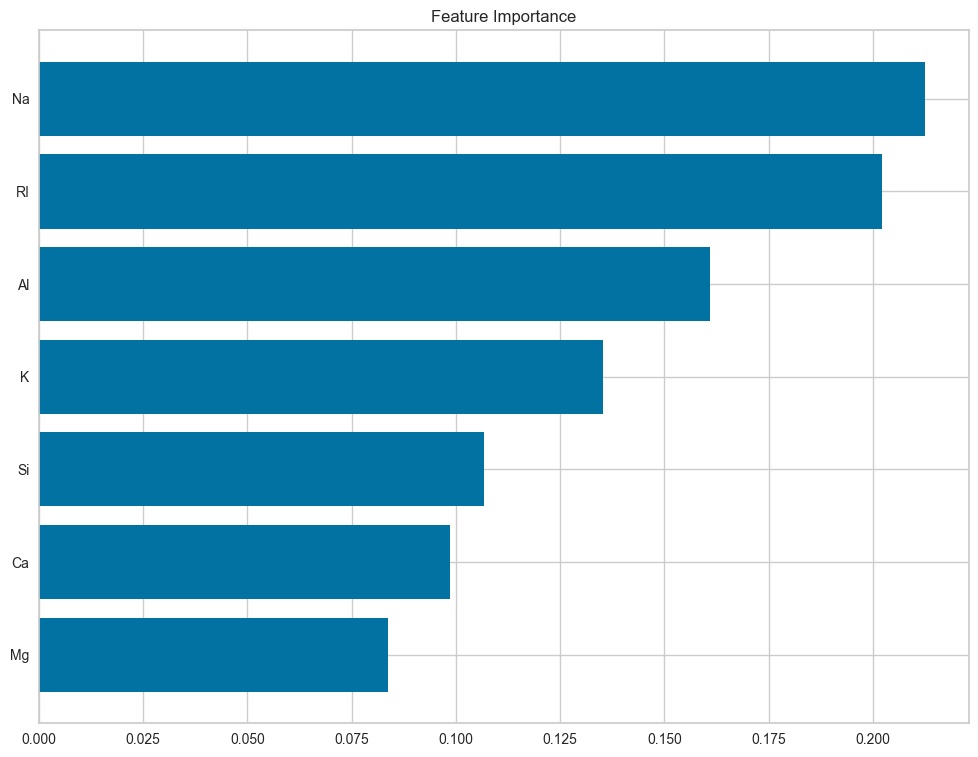

In [11]:
# Fit the rf_pipeline visualize feature importance
pipe.fit(X_train, y_train)

# Access the feature importances
feature_importances = pipe.named_steps['classifier'].feature_importances_

sorted_idx = np.argsort(feature_importances)
fig = plt.figure(figsize=(12, 9))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [12]:
# Print best parameters and best score for RandomForestClassifier
y_pred_my = random_search.predict(X_test_Scaled)
print("Best Parameters (RF): ", random_search.best_params_)
print("Best Score (RF): ", random_search.best_score_)

f1 = f1_score(y_test, y_pred_my, average='weighted')  
precision = precision_score(y_test, y_pred_my, average='weighted')
recall = recall_score(y_test, y_pred_my, average='weighted')
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)


Best Parameters (RF):  {'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None}
Best Score (RF):  0.6908045977011494
F1-score: 0.656196111580727
Precision: 0.7253757736516357
Recall: 0.676923076923077


Accuracy of My RFClass MOD: 0.676923076923077


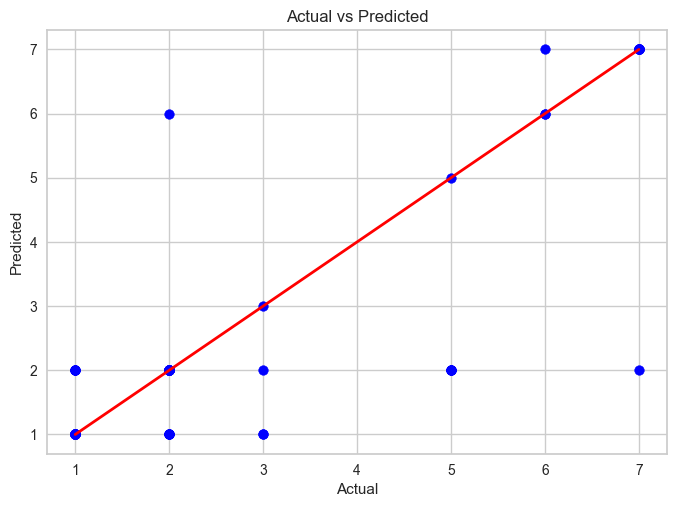

In [13]:
# CHECKING How often is my model RF classifier is correct?
accuracy = accuracy_score(y_test, y_pred_my)
print("Accuracy of My RFClass MOD:", metrics.accuracy_score(y_test, y_pred_my))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_my, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [14]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [15]:
# setting up another model using pycaret
cat_features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
experiment = setup(df, target='Type', categorical_features=cat_features, use_gpu=True, verbose=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Description,Value
0,Session id,1897
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 34)"
6,Transformed train set shape,"(149, 34)"
7,Transformed test set shape,"(65, 34)"
8,Categorical features,9
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

In [16]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8200,0.4734,0.8200,0.7802,0.7878,0.7508,0.7649,0.2120
rf,Random Forest Classifier,0.7995,0.4640,0.7995,0.7517,0.7585,0.7174,0.7406,0.6460
lightgbm,Light Gradient Boosting Machine,0.7733,0.4551,0.7733,0.7531,0.7409,0.6874,0.7067,2.4550
gbc,Gradient Boosting Classifier,0.7719,0.0000,0.7719,0.7594,0.7485,0.6846,0.6989,0.5500
dt,Decision Tree Classifier,0.7252,0.3793,0.7252,0.7506,0.7140,0.6229,0.6378,0.0530
knn,K Neighbors Classifier,0.6719,0.4475,0.6719,0.6070,0.6158,0.5341,0.5631,0.1740
lda,Linear Discriminant Analysis,0.6176,0.0000,0.6176,0.6123,0.5923,0.4701,0.4905,0.0620
lr,Logistic Regression,0.5833,0.0000,0.5833,0.5226,0.5420,0.4081,0.4208,0.1850
ridge,Ridge Classifier,0.5495,0.0000,0.5495,0.4686,0.4871,0.3589,0.3839,0.0610
ada,Ada Boost Classifier,0.3690,0.0000,0.3690,0.1715,0.2292,0.0722,0.1236,0.1220


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [17]:
# getting random forest
pyc_mod = create_model('rf')
# checking accuracy 
predict_model(pyc_mod, df.sample(50))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8667,0.0000,0.8667,0.8444,0.8444,0.8113,0.8217
1,0.8000,0.0000,0.8000,0.8000,0.7700,0.7020,0.7396
2,0.8000,0.9158,0.8000,0.6984,0.7426,0.7188,0.7288
3,0.8000,0.9652,0.8000,0.8000,0.8000,0.7321,0.7321
4,0.7333,0.8833,0.7333,0.6583,0.6786,0.6250,0.6521
5,0.8667,0.9467,0.8667,0.8381,0.8407,0.8171,0.8331
6,0.8000,0.9286,0.8000,0.7000,0.7430,0.7239,0.7336
7,0.6667,0.0000,0.6667,0.7000,0.6127,0.5312,0.6125
8,0.7333,0.0000,0.7333,0.6083,0.6564,0.6154,0.6485


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9200,0.9951,0.9200,0.9152,0.9136,0.8900,0.8922


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,prediction_label,prediction_score
204,1.52,14.95,0.00,2.27,73.30,0.00,8.71,0.67,0.00,7,7,0.99
25,1.52,12.98,3.54,1.21,73.00,0.65,8.53,0.00,0.00,1,1,0.86
151,1.52,14.32,3.90,0.83,71.50,0.00,9.49,0.00,0.00,3,1,0.69
179,1.52,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00,6,6,0.81
209,1.52,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,7,0.95
133,1.52,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15,2,2,0.91
49,1.52,13.58,3.35,1.23,72.08,0.59,8.91,0.00,0.00,1,1,0.95
150,1.52,13.14,3.45,1.76,72.48,0.60,8.38,0.00,0.17,3,3,0.64
173,1.52,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,2,0.59
192,1.52,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,7,0.81


In [18]:
# tuning model with pycaret 
tuned_model = tune_model(pyc_mod)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8667,0.0000,0.8667,0.9000,0.8741,0.8148,0.8200
1,0.8667,0.0000,0.8667,0.8333,0.8392,0.8026,0.8203
2,0.7333,0.9212,0.7333,0.6889,0.7067,0.6364,0.6403
3,0.8000,0.9219,0.8000,0.8556,0.8035,0.7384,0.7515
4,0.7333,0.8943,0.7333,0.6583,0.6786,0.6250,0.6521
5,0.7333,0.9733,0.7333,0.8667,0.7656,0.6667,0.6939
6,0.8000,0.9200,0.8000,0.7222,0.7511,0.7305,0.7395
7,0.6667,0.0000,0.6667,0.7444,0.6758,0.5640,0.5774
8,0.8667,0.0000,0.8667,0.7714,0.8111,0.8125,0.8351


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [19]:
# checking prediction accuracy again with tuned model

predict_model(tuned_model, df.sample(50))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9200,0.9951,0.9200,0.9152,0.9136,0.8900,0.8922


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,prediction_label,prediction_score
204,1.52,14.95,0.00,2.27,73.30,0.00,8.71,0.67,0.00,7,7,0.99
25,1.52,12.98,3.54,1.21,73.00,0.65,8.53,0.00,0.00,1,1,0.86
151,1.52,14.32,3.90,0.83,71.50,0.00,9.49,0.00,0.00,3,1,0.69
179,1.52,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00,6,6,0.81
209,1.52,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,7,0.95
133,1.52,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15,2,2,0.91
49,1.52,13.58,3.35,1.23,72.08,0.59,8.91,0.00,0.00,1,1,0.95
150,1.52,13.14,3.45,1.76,72.48,0.60,8.38,0.00,0.17,3,3,0.64
173,1.52,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5,2,0.59
192,1.52,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,7,0.81


In [20]:
# checking accuracy of pycaret RF classifier

tuned_model.fit(X_train_Scaled, y_train)
y_pred_pyc = tuned_model.predict(X_test_Scaled)

f1 = f1_score(y_test, y_pred_pyc, average='weighted')  
precision = precision_score(y_test, y_pred_pyc, average='weighted')
recall = recall_score(y_test, y_pred_pyc, average='weighted')
print("pycaret RF F1-score:", f1)
print("pycaret RF Precision:", precision)
print("pycaret RF Recall:", recall)

pycaret RF F1-score: 0.7474399797891454
pycaret RF Precision: 0.7613162393162394
pycaret RF Recall: 0.7538461538461538


Accuracy of My Pycaret MOD: 0.7538461538461538


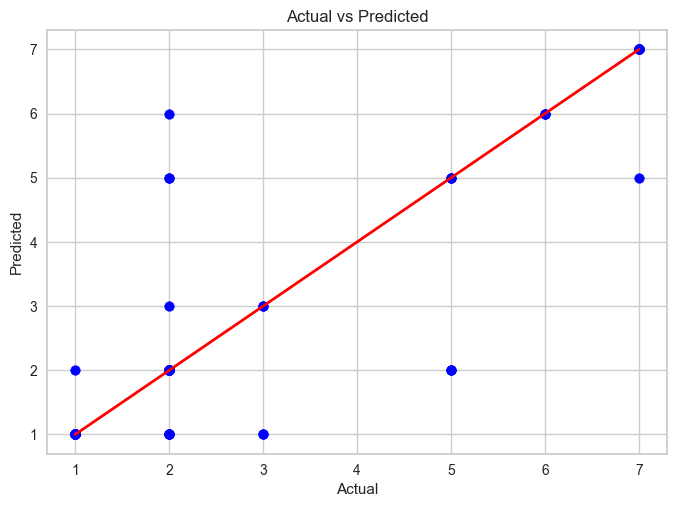

In [21]:
# CHECKING How often is PYCARET model RF classifier is correct?
accuracy = accuracy_score(y_test, y_pred_pyc)
print("Accuracy of My Pycaret MOD:", metrics.accuracy_score(y_test, y_pred_pyc))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_pyc, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Accuracy of My RFClass MOD: 0.676923076923077
Accuracy of My Pycaret MOD: 0.7538461538461538


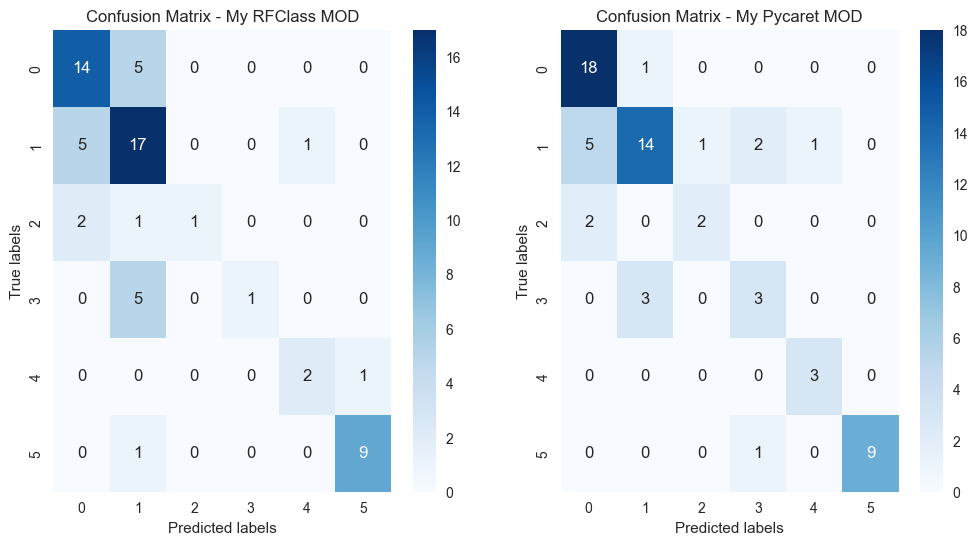

In [22]:
# CHECKING How often is MY MODEL V/S PYCARET RF classifier is correct?
accuracy_my = accuracy_score(y_test, y_pred_my)
accuracy_pyc = accuracy_score(y_test, y_pred_pyc)

print("Accuracy of My RFClass MOD:", accuracy_my)
print("Accuracy of My Pycaret MOD:", accuracy_pyc)

# Confusion matrix plot
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_my = confusion_matrix(y_test, y_pred_my)
cm_pyc = confusion_matrix(y_test, y_pred_pyc)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_my, annot=True, cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - My RFClass MOD")

plt.subplot(1, 2, 2)
sns.heatmap(cm_pyc, annot=True, cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix - My Pycaret MOD")

plt.show()

Accuracy of My RFClass MOD: 0.676923076923077
Accuracy of My Pycaret MOD: 0.7538461538461538


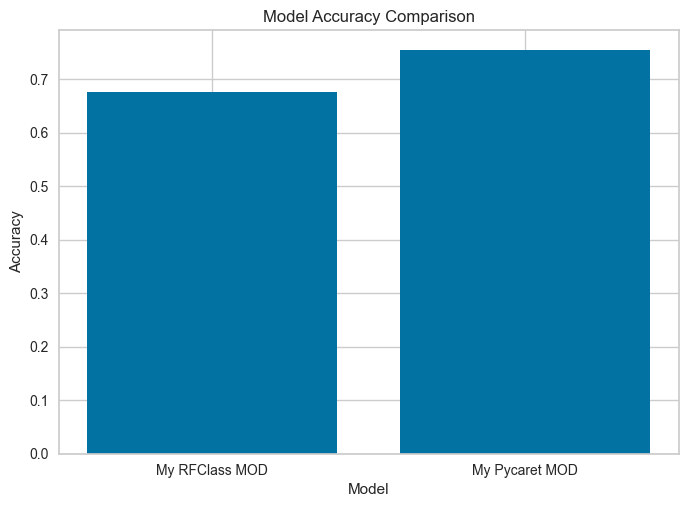

In [23]:
# CHECKING How often is MY MODEL V/S PYCARET RF classifier is correct?
accuracy_my = accuracy_score(y_test, y_pred_my)
accuracy_pyc = accuracy_score(y_test, y_pred_pyc)

print("Accuracy of My RFClass MOD:", accuracy_my)
print("Accuracy of My Pycaret MOD:", accuracy_pyc)

# Bar plot of accuracy
import matplotlib.pyplot as plt

plt.bar(['My RFClass MOD', 'My Pycaret MOD'], [accuracy_my, accuracy_pyc])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

Accuracy of My RFClass MOD: 0.676923076923077
Accuracy of My Pycaret MOD: 0.7538461538461538


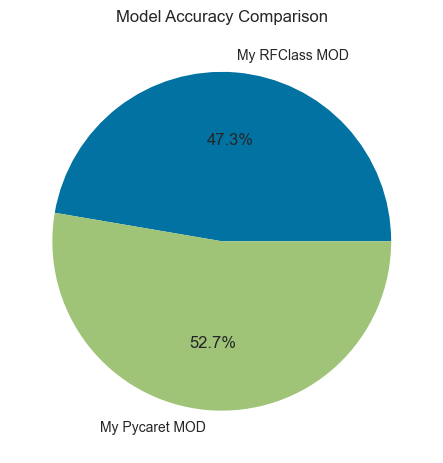

In [24]:
# CHECKING How often is MY MODEL V/S PYCARET RF classifier is correct?
accuracy_my = accuracy_score(y_test, y_pred_my)
accuracy_pyc = accuracy_score(y_test, y_pred_pyc)

print("Accuracy of My RFClass MOD:", accuracy_my)
print("Accuracy of My Pycaret MOD:", accuracy_pyc)

# Pie chart of accuracy
import matplotlib.pyplot as plt

plt.pie([accuracy_my, accuracy_pyc], labels=['My RFClass MOD', 'My Pycaret MOD'], autopct='%1.1f%%')
plt.title('Model Accuracy Comparison')
plt.show()

In [25]:
# saving the best perfromance model for the job 

save_model(tuned_model, model_name='best_rfc_Glass')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
 